# S07 T01: Tasca dades, probabilitats i estadístiques

## Nivell 1. Exercici 1
### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [35]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import random 
from scipy import stats
from scipy.stats import gmean, hmean


In [2]:
# the sport's data is about earning of e-game players
df = pd.read_csv("HistoricalEsportData.csv")
df.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


In [3]:
df.shape

(7012, 5)

In [4]:
df.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

In [5]:
df.Earnings.describe()

count    7.012000e+03
mean     1.471553e+05
std      9.258377e+05
min      0.000000e+00
25%      9.847575e+02
50%      8.873090e+03
75%      5.517293e+04
max      3.671356e+07
Name: Earnings, dtype: float64

In [14]:
df.Game.unique

<bound method Series.unique of 0                       QuakeWorld
1                         Quake II
2                         Quake II
3                       QuakeWorld
4                         Quake II
                   ...            
7007             Age of Empires II
7008             Trackmania (2020)
7009                    Diabotical
7010    Super Smash Bros. Ultimate
7011                    Brawlhalla
Name: Game, Length: 7012, dtype: object>

In [15]:
df.Players.describe()

count    7012.000000
mean       52.709641
std       119.655604
min         0.000000
25%         5.000000
50%        15.000000
75%        44.000000
max      1699.000000
Name: Players, dtype: float64

In [16]:
df.Tournaments.describe()

count    7012.000000
mean        6.546492
std        12.236239
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       172.000000
Name: Tournaments, dtype: float64

In [17]:
df_mean = round(df.mean(), 3)
df_mean["Earnings"] 

147155.265

In [18]:
# The value in the middle of the rest of values is 8.873,09, when they are in order
df_median = round(df.median(), 3)
df_median["Earnings"]

8873.09

In [19]:
# 0,0 is the most frequently occurring number  
df_mode = round(df.mode(), 3)
df_mode["Earnings"]

0    0.0
Name: Earnings, dtype: float64

In [20]:
# the average distance between each quantity and mean is 925837,733, that means that there are a big distance.
df_std =round(df.std(),3)
df_std["Earnings"]

925837.733

Text(0.5, 1.0, 'Earnings distribution (in millions of USD)')

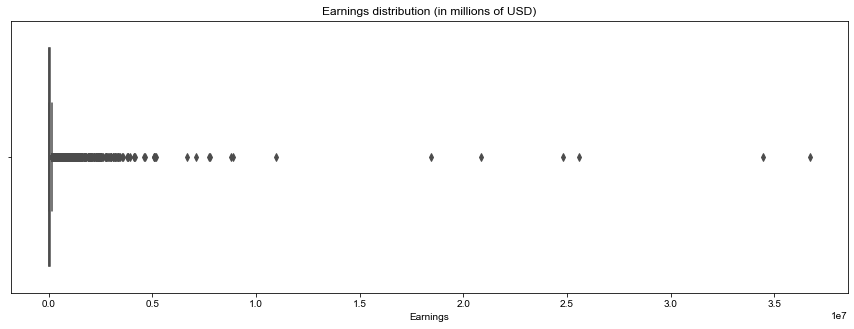

In [21]:
# The graphic let us know the distribution of the descriptive statistics
import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x= df["Earnings"])
plt.title("Earnings distribution (in millions of USD)")

Text(0.5, 1.0, 'Earnings distribution (in millions of USD)')

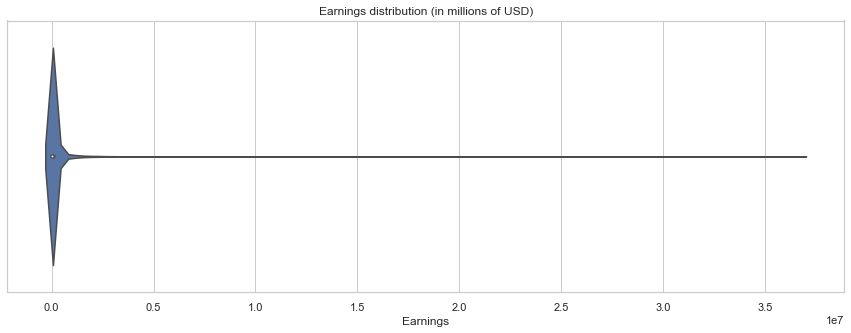

In [22]:
#this graph is much more clean but less clear when we have the outliers.
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(data=df, x='Earnings')
plt.title("Earnings distribution (in millions of USD)")

## Nivell 1. Exercici 2
### Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [23]:
correlation_series = df['Tournaments'].corr(df['Players'])
correlation_series

0.7370701910880015

<AxesSubplot:>

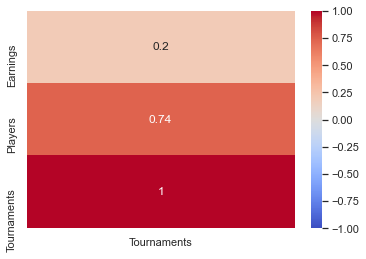

In [24]:
# we plot the correlation of the Tournaments with other variables.
upp_mat = np.triu(df.corr())

sns.heatmap(df.corr()[['Tournaments']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

#### The correlation between the two variables are very low 0.197

## Nivell 2. Exercici 3
### Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [25]:
# We have the same result because the dataFrame has only two numeric variables
coor = df.corr()
coor

,Earnings,Players,Tournaments
Earnings,1.000000,0.354313,0.19705
Players,0.354313,1.000000,0.73707
Tournaments,0.197050,0.737070,1.00000


In [26]:
# creating three more variables from Date column, just to see if there is a correlation with year

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df

,Date,Game,Earnings,Players,Tournaments,year,month
0,1998-01-01,QuakeWorld,15000.00,8,1,1998,1
1,1998-05-01,Quake II,14600.00,4,1,1998,5
2,1998-07-01,Quake II,15000.00,5,1,1998,7
3,1998-07-01,QuakeWorld,6500.00,4,1,1998,7
4,1998-11-01,Quake II,36600.00,13,2,1998,11
...,...,...,...,...,...,...,...
7007,2021-10-01,Age of Empires II,3669.00,4,2,2021,10
7008,2021-10-01,Trackmania (2020),2097.14,8,3,2021,10
7009,2021-10-01,Diabotical,2012.96,24,5,2021,10
7010,2021-10-01,Super Smash Bros. Ultimate,359.41,4,1,2021,10


In [27]:
coor = df.corr()
coor

,Earnings,Players,Tournaments,year,month
Earnings,1.000000,0.354313,0.197050,0.078139,0.030768
Players,0.354313,1.000000,0.737070,0.137403,0.027921
Tournaments,0.197050,0.737070,1.000000,0.097161,0.006257
year,0.078139,0.137403,0.097161,1.000000,-0.106144
month,0.030768,0.027921,0.006257,-0.106144,1.000000


<AxesSubplot:>

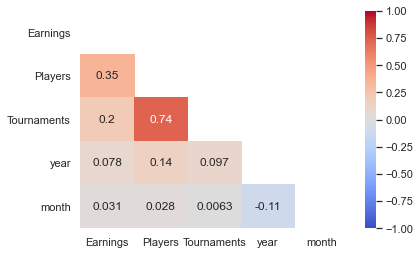

In [28]:
# Compute the correlation matrix
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

## Nivell 3. Exercici 4
### Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [29]:
df.tail()

,Date,Game,Earnings,Players,Tournaments,year,month
7007,2021-10-01,Age of Empires II,3669.00,4,2,2021,10
7008,2021-10-01,Trackmania (2020),2097.14,8,3,2021,10
7009,2021-10-01,Diabotical,2012.96,24,5,2021,10
7010,2021-10-01,Super Smash Bros. Ultimate,359.41,4,1,2021,10
7011,2021-10-01,Brawlhalla,70.00,3,1,2021,10


In [30]:
df_extract = df[["year", "Earnings", "Players"]]
df_extract

,year,Earnings,Players
0,1998,15000.00,8
1,1998,14600.00,4
2,1998,15000.00,5
3,1998,6500.00,4
4,1998,36600.00,13
...,...,...,...
7007,2021,3669.00,4
7008,2021,2097.14,8
7009,2021,2012.96,24
7010,2021,359.41,4


In [31]:
df_extract.Earnings.describe()

count    7.012000e+03
mean     1.471553e+05
std      9.258377e+05
min      0.000000e+00
25%      9.847575e+02
50%      8.873090e+03
75%      5.517293e+04
max      3.671356e+07
Name: Earnings, dtype: float64

In [32]:
# In order to have the geometric and the harmonic mean I clean the columns with 0 values.
# If not, the result will be always 0

print(f'columns has 0 as value: {df_extract[df_extract.Players==0].Players.count()}')
print(f'columns has 0 as value: {df_extract[df_extract.Earnings==0].Earnings.count()}')

columns has 0 as value: 175
columns has 0 as value: 181


In [33]:
df2= df_extract[df_extract['Earnings'] != 0]
df2

,year,Earnings,Players
0,1998,15000.00,8
1,1998,14600.00,4
2,1998,15000.00,5
3,1998,6500.00,4
4,1998,36600.00,13
...,...,...,...
7007,2021,3669.00,4
7008,2021,2097.14,8
7009,2021,2012.96,24
7010,2021,359.41,4


In [36]:
print(f'The geometric mean of Earnings is: ',round(stats.gmean(df2['Earnings']),3))
print(f'The harmonic mean of Earnings is: ',round(stats.hmean(df2['Earnings']),3))

The geometric mean of Earnings is:  8595.059
The harmonic mean of Earnings is:  609.5
